Kiefer-Wolfowitz Algorithm

In [1]:
import numpy as np
import pandas as pd
import random as rd

In [2]:
# set function generator for objective 
def Y(x, sigma):
    return(-x**2 + rd.normalvariate(mu = 0, sigma = sigma))

# initialize the Kiefer-Wolfowitz algorithm
def K_W_alg(n, sigma):
    # initialize array to hold values
    vals = np.empty([0,0])
    # initialize x1
    vals = np.append(vals, rd.uniform(0, 1))
    # iterate for each sample
    for i in np.arange(1,n+1,1):
        # generate a_n and c_n sequence values
        a_n = 1/i
        c_n = 1/(i**(1/3))
        # calculate next x_n
        vals = np.append(vals, vals[i-1] + a_n * ((Y((vals[i-1] + c_n), sigma) - Y((vals[i-1] - c_n), sigma))/(2*c_n)))
    return(vals)

In [3]:
# generate a function that generates multiple runs
def run(n, sigma, iters):
    
    # initialize a matrix holding the values
    # create empty rows that can hold the mean and sd after filling
    runs = np.zeros(n+1)
    runs = np.vstack([runs, np.zeros(n+1)])
    
    # add to the matrix for every additional run
    for i in np.arange(0,iters,1):
        runs = np.vstack([runs, K_W_alg(n, sigma)])
    runs = runs.T
        
    # calculate averages and safe to first two columns
    runs[:,0] = np.std(runs[:,2:], axis = 1)
    runs[:,1] = np.mean(runs[:,2:], axis = 1)
    
    return(runs)

In [4]:
# set reproducible seed
rd.seed(123)

# generate iterations for each sigma setting
rec_1 = run(n = 1000, sigma = 1, iters = 30) 
rec_5 = run(n = 1000, sigma = 5, iters = 30) 
rec_10 = run(n = 1000, sigma = 10, iters = 30)

print("The average obtained for x_1001 is for sigma = 1:", 
      round(rec_1[1000, 1],4), ", for sigma = 5", round(rec_5[1000, 1],4), 
      ", and for sigma = 10", round(rec_10[1000,1],4))

The average obtained for x_1001 is for sigma = 1: 0.0012 , for sigma = 5 -0.0221 , and for sigma = 10 -0.2715


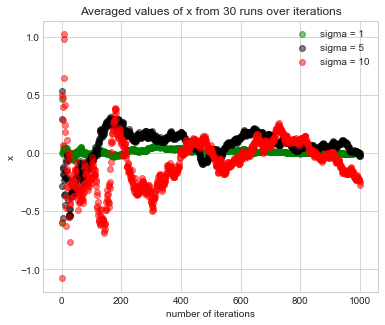

<Figure size 432x288 with 0 Axes>

In [5]:
# Let's plot this all together for averages
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[6,5])

X = np.arange(0,1001,1)
Y1 = rec_1[:,1]
Y2 = rec_5[:,1]
Y3 = rec_10[:,1]

plt.title("Averaged values of x from 30 runs over iterations")
plt.scatter(X,Y1,color='g', label = 'sigma = 1', alpha=0.5)
plt.scatter(X,Y2,color='k', label = 'sigma = 5', alpha=0.5)
plt.scatter(X,Y3,color='r', label = 'sigma = 10', alpha=0.5)
plt.ylabel('x')
plt.xlabel('number of iterations')
plt.legend(numpoints = 1)
plt.show()

plt.savefig('avg_xn.png')

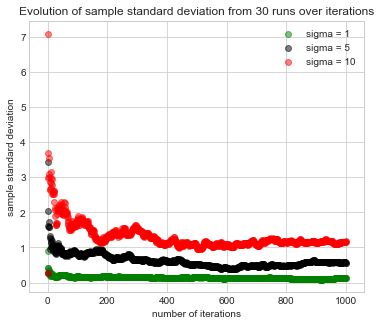

<Figure size 432x288 with 0 Axes>

In [6]:
# Let's plot this for standard deviation
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=[6,5])

X = np.arange(0,1001,1)
Y1 = rec_1[:,0]
Y2 = rec_5[:,0]
Y3 = rec_10[:,0]

plt.title("Evolution of sample standard deviation from 30 runs over iterations")
plt.scatter(X,Y1,color='g', label = 'sigma = 1', alpha=0.5)
plt.scatter(X,Y2,color='k', label = 'sigma = 5', alpha=0.5)
plt.scatter(X,Y3,color='r', label = 'sigma = 10', alpha=0.5)
plt.ylabel('sample standard deviation')
plt.xlabel('number of iterations')
plt.legend(numpoints = 1)
plt.show()

plt.savefig('sample_sd.png')